In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#null values in train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#null values in test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#visualizing the distribution for positive and negative examples
def see_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=False, figsize=(10,8))
#return dictionary containing probability of survival for different classes within indivisual feature   
def probability_of_survival(feature):
    t1=train[train['Survived']==0][feature].value_counts()
    t2=train[train['Survived']==1][feature].value_counts()
    t3=t2.loc[t1.index]
    dictn={}
    for val in t1.index:
        dictn[val]=round(t3.loc[val]/(t1.loc[val]+t3.loc[val]),2)
    return dictn


{3: 0.24, 2: 0.47, 1: 0.63}


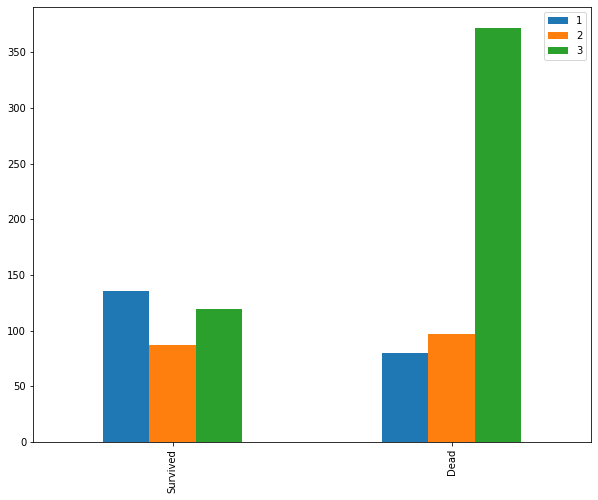

In [8]:
see_chart('Pclass')
print(probability_of_survival('Pclass'))

In [9]:
#data shows there are 63% chance of survival if person belongs to 1st class , 47% for 2nd class , 24% for 3rd class
#therfore feature "Pclass" is strong indicator for prediction

{'male': 0.19, 'female': 0.74}


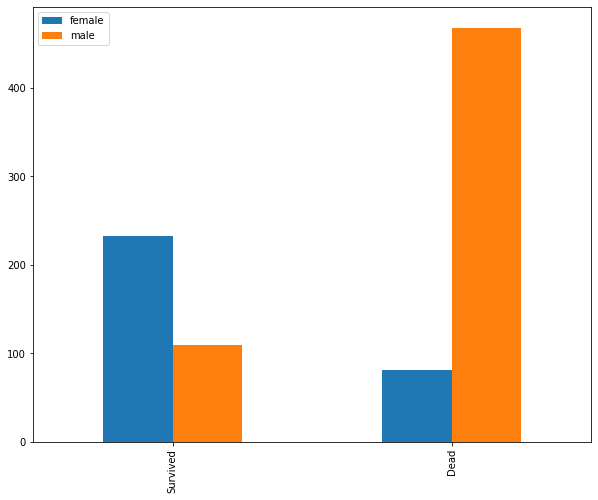

In [10]:
see_chart('Sex')
print(probability_of_survival('Sex'))

In [11]:
#data shows there are 74% chance of survival if person is female and 19% if person is male
#therfore feature "Sex" is strong indicator for prediction

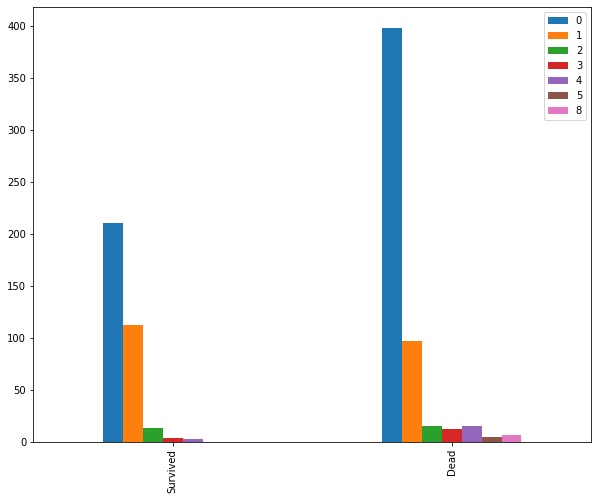

In [12]:
see_chart('SibSp')


In [13]:
#data show less chance of survival if person is single with 0 sibling

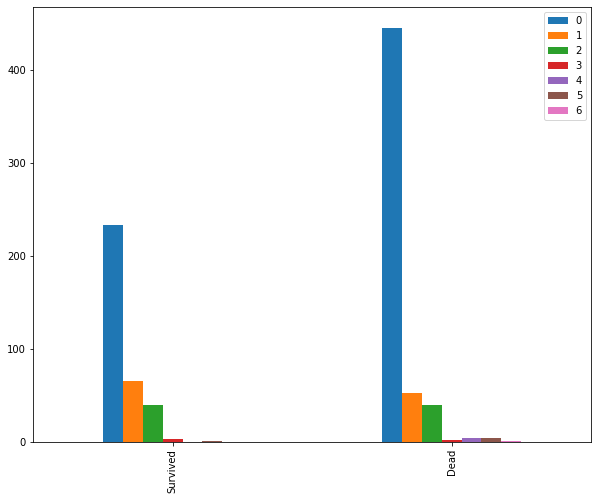

In [14]:
see_chart('Parch')


In [15]:
#data shows less chance of survival if person have 0 parch

{'S': 0.34, 'C': 0.55, 'Q': 0.39}


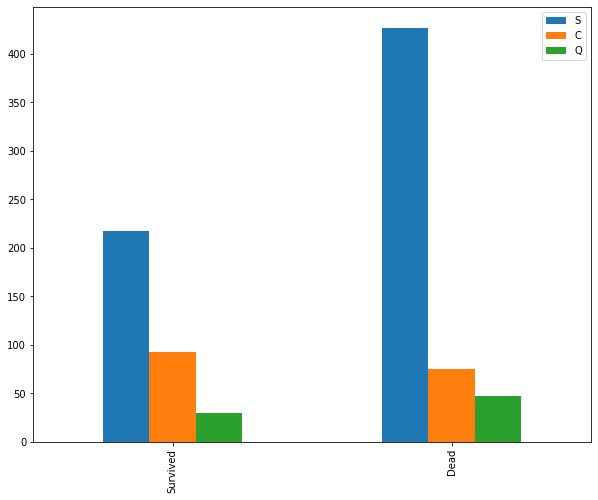

In [16]:
see_chart('Embarked')
print(probability_of_survival('Embarked'))

In [17]:
#data show 34% chance of survival if person belong to S embarked , 39 % for Q embarked , 55% for C embarked

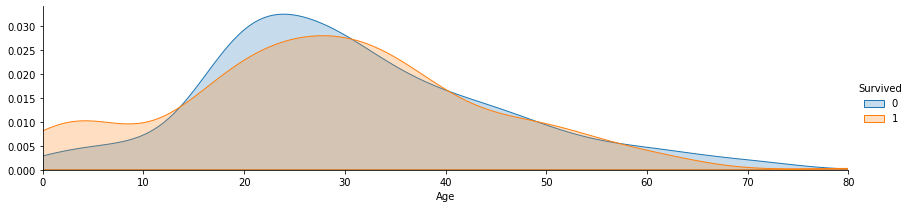

In [18]:
#Age distribution 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

In [19]:
#people with age group of less than 18 is more likely to survive

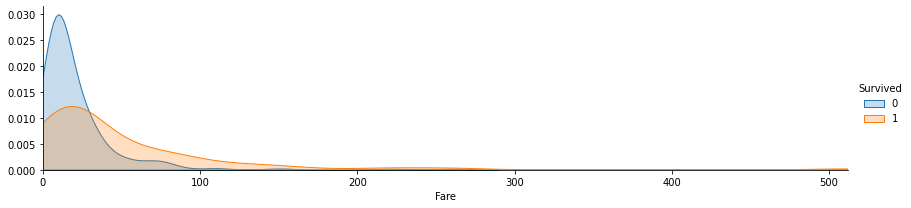

In [20]:
#fare distribution 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

In [21]:
#FEATURE ENGGINERING
#extracting more information from data 
#Name Title of person('Mr','Miss',Ms.,etc.) may be good indicator
train_test_data = [train, test] 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
#extracting first character of feature Cabin
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Jonkheer      1
Sir           1
Countess      1
Lady          1
Don           1
Capt          1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [25]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [26]:
test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [27]:
#mapping titles
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_map)

In [28]:
#mapping Sex 
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [29]:
#imputing missing values
#filling null values in Age columns by median of age grouped by Titles
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
#null values in Embarked column is only 2 in train data  we can fill by most frequent category 
train['Embarked'].fillna(train['Embarked'].value_counts().index[0],inplace=True)

In [31]:
#mapping embarked columns
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [32]:
#imputing Fare columns in test data by mean of fare grouped by Pclass
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)


<AxesSubplot:>

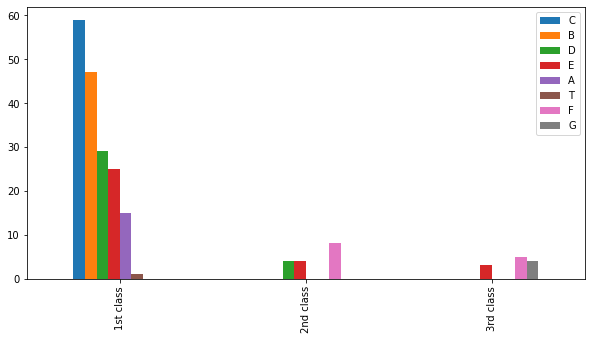

In [33]:
#most of data is empty in Cabin is empty 687 in train data and 327 in test data
#distribution of cabin among different classes
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=False, figsize=(10,5))

In [34]:
#from the plot we can see 1st class persons were in cabin C 
#therefore we can fill null value of cabin by most frequent cabin grouped by pclass


In [35]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform(lambda x: x.value_counts().index[0]), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform(lambda x: x.value_counts().index[0]), inplace=True)

In [36]:
#cabin mapping
#label encoding Cabin 
import sklearn.preprocessing as skp
lable_cabin=skp.LabelEncoder()
train['Cabin']=lable_cabin.fit_transform(train['Cabin'])
test['Cabin']=lable_cabin.transform(test['Cabin'])

In [37]:
#creating new column containing family size of person sibling+parch 
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

In [38]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family'],
      dtype='object')

In [39]:
#final features  for train and test
feature=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family']

In [40]:
#final train and test data
ftrain=train[feature]
ftest=test[feature]
#target value 
y=train['Survived']

In [41]:
#feature scalling 
fs=skp.StandardScaler()
ftrain=pd.DataFrame(fs.fit_transform(ftrain))
ftest=pd.DataFrame(fs.transform(ftest))
ftrain.columns=feature
ftest.columns=feature

In [42]:
#training data from different models and evaluting its performance
#no hyperparameter tuning now
#choosing model which gives highest accuracy score

In [43]:
import sklearn.metrics as skmet
import sklearn.model_selection as skms

In [44]:
# evaluting performance by K fold cross validation method
#taking K=5 

In [45]:
#LOGISTIC REGRESSION
import sklearn.linear_model as sklm
model_logistic_regression=sklm.LogisticRegression()
#K foldcross validation cv=5 
accuracy=skms.cross_val_score(estimator=model_logistic_regression,X=ftrain,y=y,cv=5)
#mean of accuracy score
accuracy_logistic_regression=accuracy.mean()
print('logistic regreesion model accuracy',accuracy_logistic_regression)

logistic regreesion model accuracy 0.8181721172556651


In [46]:
#SUPPORT VECTOR MACHINE
#SVC LINEAR 
import sklearn.svm as skvm
model_svc_linear=skvm.SVC(kernel='linear')
accuracy=skms.cross_val_score(estimator=model_svc_linear,X=ftrain,y=y,cv=5)
accuracy_svc_linear=accuracy.mean()
print('SVC linear model accuracy',accuracy_svc_linear)

SVC linear model accuracy 0.8080534806352395


In [47]:
#SVC NON LINEAR (kernel RBF)
import sklearn.svm as skvm
model_svc_rbf=skvm.SVC(kernel='rbf')
accuracy=skms.cross_val_score(estimator=model_svc_rbf,X=ftrain,y=y,cv=5)
accuracy_svc_rbf=accuracy.mean()
print('SVC kernel rbf model accuracy',accuracy_svc_rbf)

SVC kernel rbf model accuracy 0.8282781997363632


In [48]:
#DECISION TREE CLASSIFIER
import sklearn.tree as skt
model_decision_tree=skt.DecisionTreeClassifier()
accuracy=skms.cross_val_score(estimator=model_decision_tree,X=ftrain,y=y,cv=5)
accuracy_decision_tree=accuracy.mean()
print('decision tree model accuracy',accuracy_decision_tree)

decision tree model accuracy 0.7643274119640951


In [49]:
#RANDOM FOREST CLASSIFIER 
import sklearn.ensemble as ske
model_random_forest=ske.RandomForestClassifier()
accuracy=skms.cross_val_score(estimator=model_random_forest,X=ftrain,y=y,cv=5)
accuracy_random_forest=accuracy.mean()
print('random forest model accuracy',accuracy_random_forest)

random forest model accuracy 0.8092084614901764


In [50]:
#NAIVE BAYES CLASSIFIER
import sklearn.naive_bayes as sknb
model_naive_bayes=sknb.GaussianNB()
accuracy=skms.cross_val_score(estimator=model_naive_bayes,X=ftrain,y=y,cv=5)
accuracy_naive_bayes=accuracy.mean()
print('naive bayes model accuracy',accuracy_naive_bayes)

naive bayes model accuracy 0.7901450003138535


In [51]:
#KNN CLASSIFIER
import sklearn.neighbors as skn
model_knn=skn.KNeighborsClassifier(n_neighbors=5)
accuracy=skms.cross_val_score(estimator=model_knn,X=ftrain,y=y,cv=5)
accuracy_knn=accuracy.mean()
print('KNN model accuracy',accuracy_knn)

KNN model accuracy 0.8181972255351202


In [ ]:
#XGBOOST CLASSIFIER
import xgboost as xgb
model_xgb=xgb.XGBClassifier()
accuracy=skms.cross_val_score(estimator=model_xgb,X=ftrain,y=y,cv=5)
accuracy_xgb=accuracy.mean()
print('Xgb classifier model accuracy',accuracy_xgb)

In [123]:
#we performed model training on 8 different classification models
#overall accuracy performance, model which gives highest accuracy score will be chosen to train on data

In [63]:
print('logistic regreesion model accuracy',accuracy_logistic_regression)
print('SVC linear model accuracy',accuracy_svc_linear)
print('SVC kernel rbf model accuracy',accuracy_svc_rbf)
print('decision tree model accuracy',accuracy_decision_tree)
print('random forest model accuracy',accuracy_random_forest)
print('naive bayes model accuracy',accuracy_naive_bayes)
print('KNN model accuracy',accuracy_knn)
print('Xgb classifier model accuracy',accuracy_xgb)

logistic regreesion model accuracy 0.8181721172556651
SVC linear model accuracy 0.8080534806352395
SVC kernel rbf model accuracy 0.8282781997363632
decision tree model accuracy 0.7643274119640951
random forest model accuracy 0.8092084614901764
naive bayes model accuracy 0.7901450003138535
KNN model accuracy 0.8181972255351202
Xgb classifier model accuracy 0.8125792480070302


In [55]:
#best model is SVC (kernel =rbf) 

In [56]:
#hyperparameter tuning 
#grid search 
#finding best parameters which can fit model best

In [57]:
#GRID SEARCH
model=skvm.SVC(kernel='rbf',random_state=0)
parameter={'C': [0.1,0.25,0.5,1,2,5, 10,100,1000], 'gamma': [0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9,1,'scale']}
grid_search = skms.GridSearchCV(estimator =model, param_grid = parameter,scoring = 'accuracy',cv = 5,n_jobs = -1)
grid_search.fit(ftrain,y)
print('best_score grid search',grid_search.best_score_)
print('best_parameters',grid_search.best_params_)

best_score grid search 0.8327663046889711
best_parameters {'C': 0.25, 'gamma': 0.4}


In [58]:
#fitting entire train data on best estimator 
best_model=grid_search.best_estimator_
best_model.fit(ftrain,y)

SVC(C=0.25, gamma=0.4, random_state=0)

In [59]:
#prediction of test data
test_prediction=best_model.predict(ftest)

In [60]:
new=pd.DataFrame()
new['PassengerId']=test['PassengerId']
new['Survived']=test_prediction
new.to_csv('mysubmission.csv',index=False)

In [62]:
#this test prediction resulted in accuracy score of  0.77511 on submitting at kaggle titanic competition 
#means 324 out of 418 test data were correctly predicted